Imports the necessary libraries and sets up data table

In [1]:
import pandas
import numpy
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import neural_network
from sklearn import metrics
from sklearn import neighbors
from sklearn import tree
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt


#data = pandas.read_csv('minmax_normalised_trackdata.csv')
#data = pandas.read_csv('dupremoved_trackdata.csv')
#data = pandas.read_csv('softmax_normalised_trackdata.csv')
#data = pandas.read_csv('zscore_normalised_trackdata.csv')
data = pandas.read_csv('collinearity_removed.csv')
#data = pandas.read_csv('dbscanned_trackdata.csv')

data.info()
genreMap = sorted(data["genre"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6063 entries, 0 to 6062
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        6063 non-null   float64
 1   danceability      6063 non-null   float64
 2   key               6063 non-null   int64  
 3   mode              6063 non-null   int64  
 4   speechiness       6063 non-null   float64
 5   acousticness      6063 non-null   float64
 6   instrumentalness  6063 non-null   float64
 7   liveness          6063 non-null   float64
 8   valence           6063 non-null   float64
 9   tempo             6063 non-null   float64
 10  duration_ms       6063 non-null   float64
 11  time_signature    6063 non-null   int64  
 12  genre             6063 non-null   object 
dtypes: float64(9), int64(3), object(1)
memory usage: 615.9+ KB


Training and testing set creation 

In [51]:
#uncomment the first X if using anything that isn't collinearity_removed.csv
#X = data.drop(["name", "artist", "album", "duration_ms", "id", "genre"], axis=1)
X = data.drop("genre", axis=1)
y = preprocessing.LabelEncoder().fit_transform(data["genre"])


Metrics using neural network

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)
model = neural_network.MLPClassifier(activation= 'tanh', max_iter= 10000000).fit(X_train, y_train)  


yPredicted = model.predict(X_test)
metrics.plot_confusion_matrix(model, X_test, y_test, cmap='GnBu')
plt.show()

print('Accuracy: %.3f' % metrics.accuracy_score(y_test, yPredicted))
print('Precision: %.3f' % metrics.precision_score(y_test, yPredicted, average="macro"))
print('Recall: %.3f' % metrics.recall_score(y_test, yPredicted, average="macro")) 
print(genreMap)

Metrics using K neighbors, k clusters found using elbow method

In [ ]:
maxAccuracy = 0
for i in range(1000) :
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)
    scaler = StandardScaler()  
    scaler.fit(X_train)  
    X_train = scaler.transform(X_train)  
    X_test = scaler.transform(X_test)
    model = neighbors.KNeighborsClassifier(n_neighbors= i + 1, weights= 'distance', algorithm= 'brute')
    model.fit(X_train, y_train) 
    yPredicted = model.predict(X_test)
    if  metrics.accuracy_score(y_test, yPredicted) > maxAccuracy :
        bestX = X_test
        bestY = y_test
        bestPrediction = yPredicted
        maxAccuracy =  metrics.accuracy_score(y_test, yPredicted)

metrics.plot_confusion_matrix(model, bestX, bestY, cmap='GnBu')
plt.show()

print('Accuracy: %.3f' % maxAccuracy)
print('Precision: %.3f' % metrics.precision_score(bestY, bestPrediction, average="macro"))
print('Recall: %.3f' % metrics.recall_score(bestY, bestPrediction, average="macro")) 
print(genreMap)


In [ ]:
Metrics using Decision Trees

/Users/tuan/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


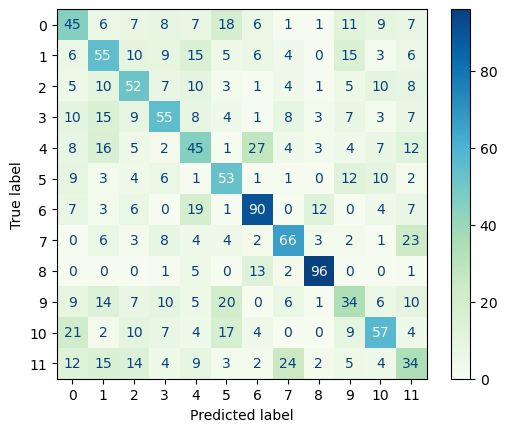

Accuracy: 0.450
Precision: 0.449
Recall: 0.452


In [13]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)
model = tree.DecisionTreeClassifier(criterion = 'entropy', splitter = 'best').fit(X_train, y_train)


yPredicted = model.predict(X_test)
metrics.plot_confusion_matrix(model, X_test, y_test, cmap='GnBu')
plt.show()
print('Accuracy: %.3f' % metrics.accuracy_score(y_test, yPredicted))
print('Precision: %.3f' % metrics.precision_score(y_test, yPredicted, average="macro"))
print('Recall: %.3f' % metrics.recall_score(y_test, yPredicted, average="macro")) 

/Users/tuan/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


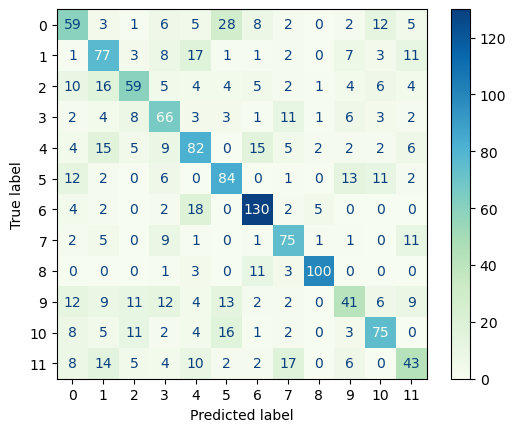

Accuracy: 0.588
Precision: 0.583
Recall: 0.583


In [66]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)
model = svm.SVC(C = 1.5, kernel = 'rbf', degree = 9, gamma = 'scale', decision_function_shape= 'ovo').fit(X_train, y_train)


yPredicted = model.predict(X_test)
metrics.plot_confusion_matrix(model, X_test, y_test, cmap='GnBu')
plt.show()
print('Accuracy: %.3f' % metrics.accuracy_score(y_test, yPredicted))
print('Precision: %.3f' % metrics.precision_score(y_test, yPredicted, average="macro"))
print('Recall: %.3f' % metrics.recall_score(y_test, yPredicted, average="macro")) 